In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "pauper"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipList = ['/decklist/modern-challenge-32-2025-08-3112812792', '/decklist/modern-challenge-64-2025-08-3012812786']

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["date"] >= startDate
        if x["url"] not in skipList
    ]

    print(urlList)

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

['/decklist/pauper-league-2025-08-319535', '/decklist/pauper-challenge-32-2025-08-3012812783', '/decklist/pauper-league-2025-08-309535', '/decklist/pauper-challenge-32-2025-08-2912812769', '/decklist/pauper-league-2025-08-299535', '/decklist/pauper-league-2025-08-289535', '/decklist/pauper-league-2025-08-279535', '/decklist/pauper-league-2025-08-269535', '/decklist/pauper-league-2025-08-259535', '/decklist/pauper-challenge-32-2025-08-2412812181', '/decklist/pauper-league-2025-08-249535']
                                                        Main/Side  \
Deck URL                                         Deck               
/decklist/pauper-challenge-32-2025-08-2412812181 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                                                 Deck 0      Main   
                        

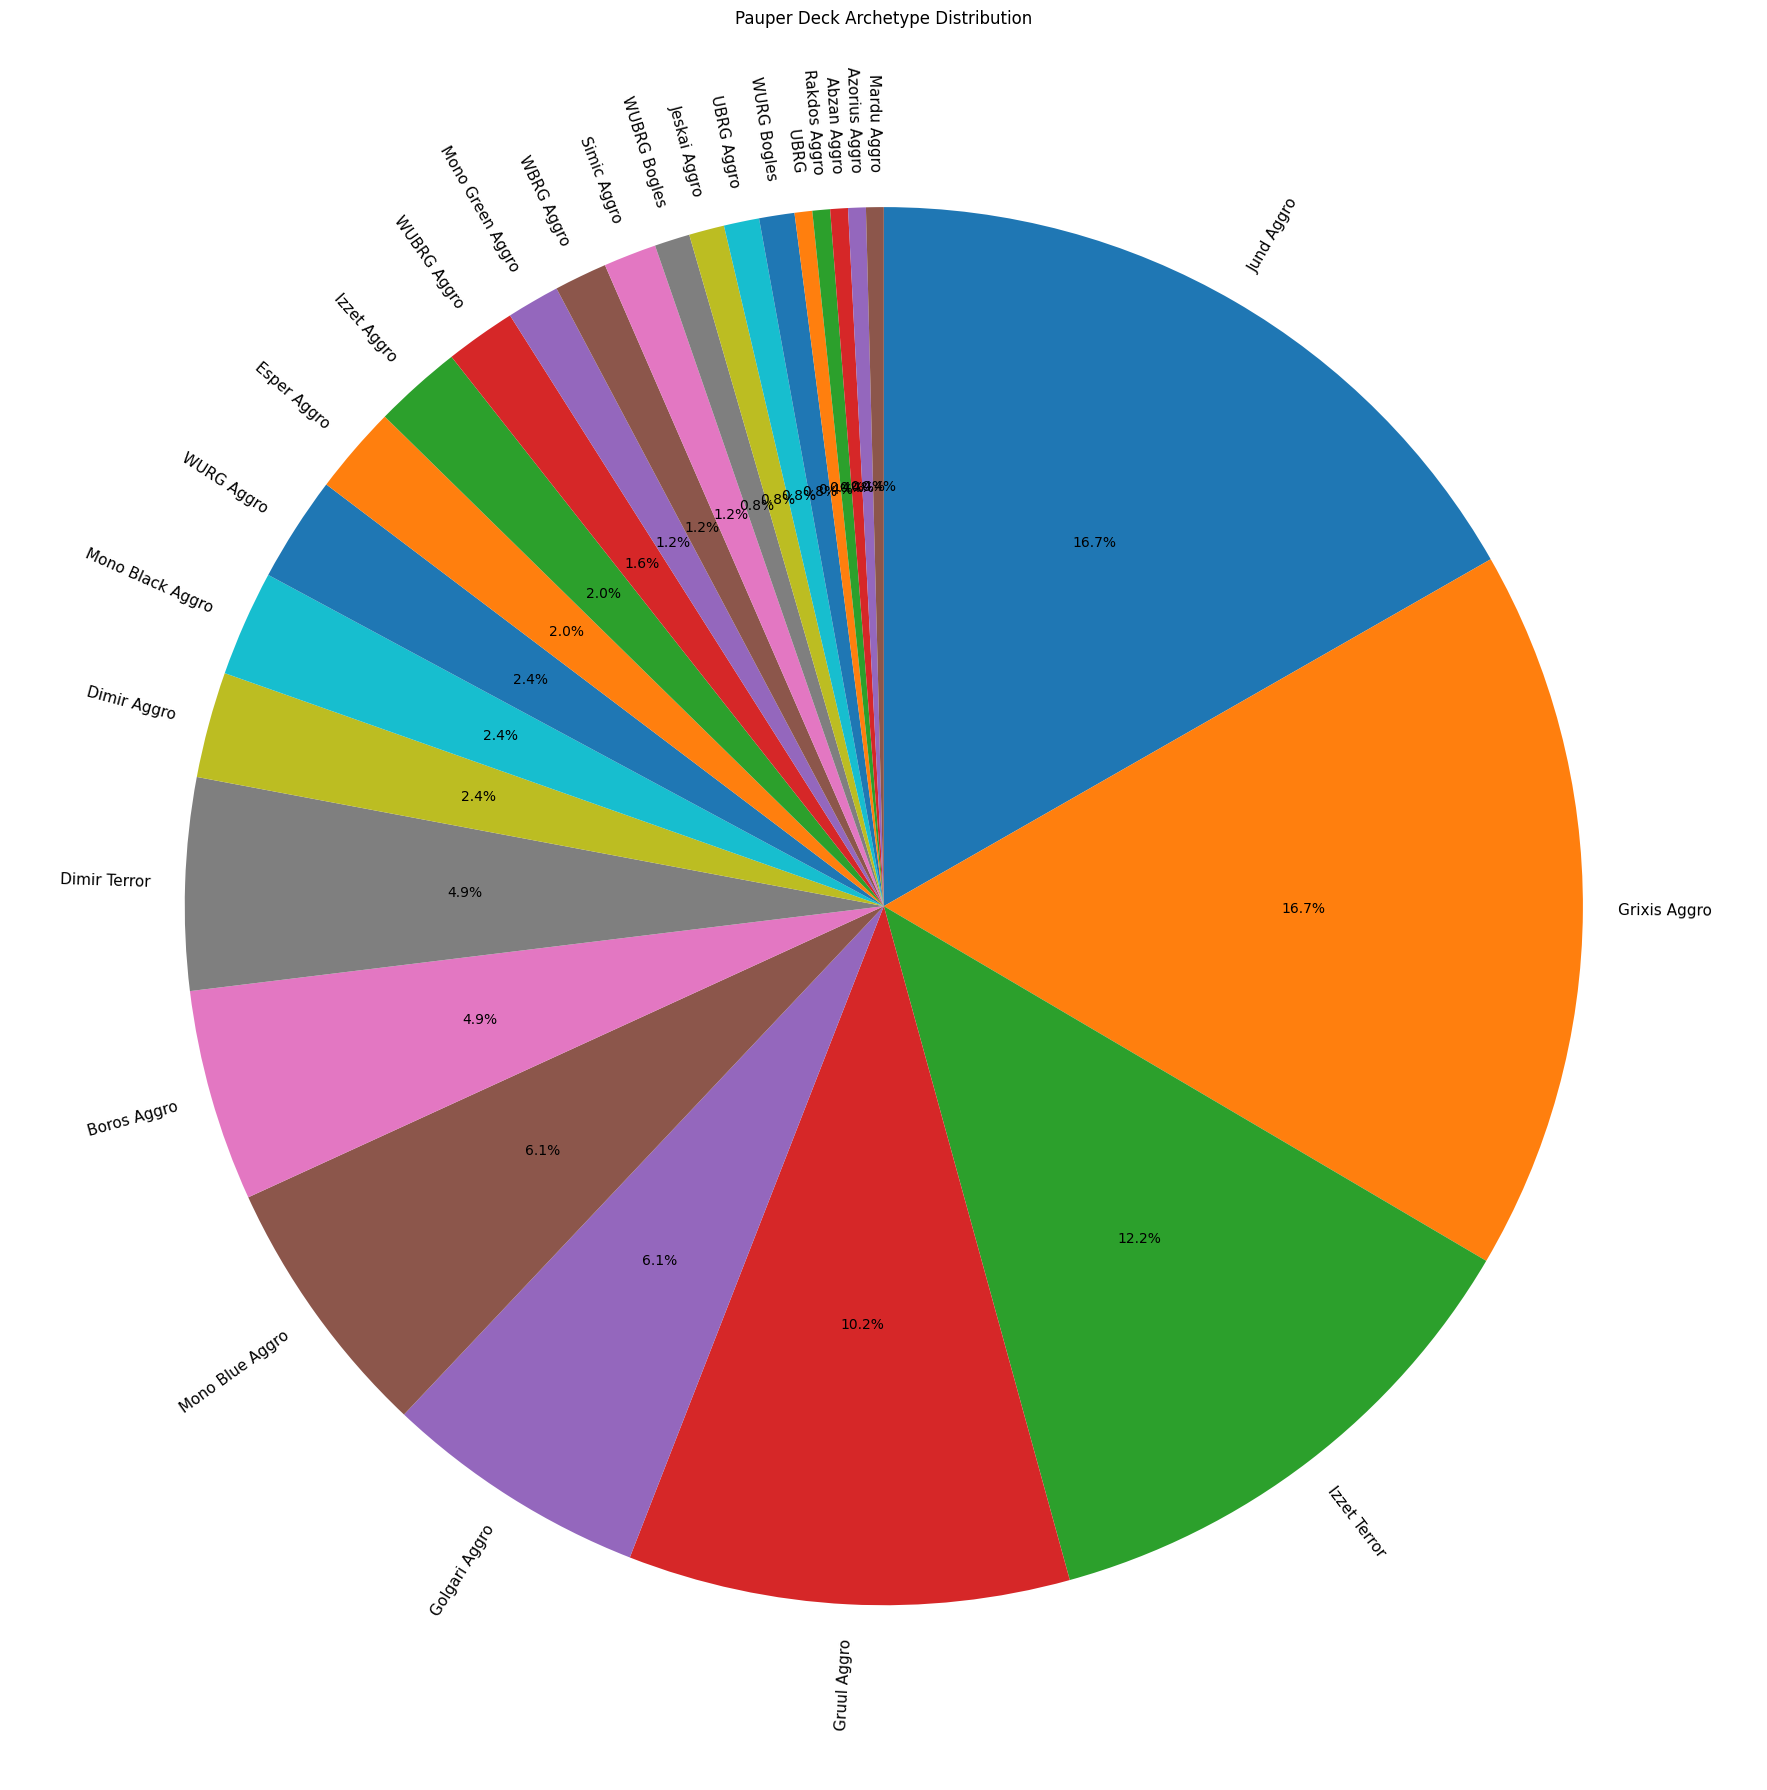

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

199 deck(s) without any of the specified key cards
Jund Aggro


Main/Side  \
Deck URL                                         Deck               
/decklist/pauper-challenge-32-2025-08-2412812181 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Main   
                                                 Deck 1      Side   
                                                 Deck 1      Side   
                                                 Deck 1      Side   

                                                                     Card Name  \
Deck URL                                         Deck                            
/decklist/pauper-challenge-32-2025-08-2412812181 Deck 1     Cleansing Wildfire   
                                                 Deck 1              Cast Down   
                                                 Deck 1     Fanatical Offering   
                                                 Deck 1       Ichor Wellspring   
                                                 Deck 1   Refurbished Familiar   
                                                 Deck 1     Writhing Chrysalis   
                                                 Deck 1      Weather the Storm   
                                                 Deck 1              Pyroblast   
                                                 Deck 1                 Duress   
                                                 Deck 1      Krark-Clan Shaman   
                                                 Deck 1         Blood Fountain   
                                                 Deck 1                 Duress   
                                                 Deck 1          Breath Weapon   
                                                 Deck 1                 Lembas   
                                                 Deck 1  Eviscerator's Insight   
                                                 Deck 1        Nihil Spellbomb   
                                                 Deck 1    Makeshift Munitions   
                                                 Deck 1        Pulse of Murasa   
                                                 Deck 1          Nyxborn Hydra   
                                                 Deck 1        Nihil Spellbomb   
                                                 Deck 1    Red Elemental Blast   
                                                 Deck 1     Troublemaker Ouphe   

                                                         Quantity  mana_cost  \
Deck URL                                         Deck                          
/decklist/pauper-challenge-32-2025-08-2412812181 Deck 1         4     {1}{R}   
                                                 Deck 1         4     {1}{B}   
                                                 Deck 1         4     {1}{B}   
                              

In [4]:
includedCardList = []
excludedCardList = []
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Island                     3.67
Mountain                   3.62
Forest                     1.85
Swamp                      1.55
Lightning Bolt             1.16
                           ... 
Crashing Drawbridge        0.00
Brave the Wilds            0.00
Cast into the Fire         0.00
Union of the Third Path    0.00
Unearth                    0.00
Name: Quantity, Length: 410, dtype: float64

In [5]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Island                     898
Mountain                   886
Forest                     454
Swamp                      380
Lightning Bolt             285
                          ... 
Crashing Drawbridge          1
Brave the Wilds              1
Cast into the Fire           1
Union of the Third Path      1
Unearth                      1
Name: Quantity, Length: 410, dtype: int64